# Using Computer Simulation for Understanding Organizations as Complex Systems
## Group 4 Final Data Analysis
### Impact of Social Networking on organization efficiency and peer specialization.
#### Authors: Tobias Ettling, Gian Andri Hofmann, Jakob Koller & Kai Schultz


### Setup

In [23]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

### Load in Data

In [24]:
# Directory containing the CSV files
data_folder = "../data"

# Dictionary to hold DataFrames
data_frames = {}

# Loop through all files in the data folder
for file_name in os.listdir(data_folder):
    if file_name.endswith('.csv'):
        # Load the CSV data into a DataFrame
        df = pd.read_csv(os.path.join(data_folder, file_name), skiprows=24)
        
        # Keep only columns without .number
        # df = df.loc[:, ~df.columns.str.contains(r'\.\d+$')]

        # Store the DataFrame in the dictionary with the file name as the key
        data_frames[file_name] = df

        # Display the columns of the DataFrame to verify      
        print(f" {file_name} columns: {df.columns}")

# Display the keys of the dictionary to verify
print(data_frames.keys())

 new2 FINAL_FREQ_40_LINK_3-spreadsheet.csv columns: Index(['[all run data]', '[step]', 'tasks-finished', 'payoff_tasks_finished',
       'payoff_per_node_avg', '[step].1', 'tasks-finished.1',
       'payoff_tasks_finished.1', 'payoff_per_node_avg.1', '[step].2',
       'tasks-finished.2', 'payoff_tasks_finished.2', 'payoff_per_node_avg.2',
       '[step].3', 'tasks-finished.3', 'payoff_tasks_finished.3',
       'payoff_per_node_avg.3', '[step].4', 'tasks-finished.4',
       'payoff_tasks_finished.4', 'payoff_per_node_avg.4', '[step].5',
       'tasks-finished.5', 'payoff_tasks_finished.5', 'payoff_per_node_avg.5',
       '[step].6', 'tasks-finished.6', 'payoff_tasks_finished.6',
       'payoff_per_node_avg.6', '[step].7', 'tasks-finished.7',
       'payoff_tasks_finished.7', 'payoff_per_node_avg.7', '[step].8',
       'tasks-finished.8', 'payoff_tasks_finished.8', 'payoff_per_node_avg.8',
       '[step].9', 'tasks-finished.9', 'payoff_tasks_finished.9',
       'payoff_per_node_avg.9'],

### Filter out Step 2080 (aquivalent to 1 year in the simulation)
### There are 10 runs for each of the scenario (parameter setting) and we will average over these runs and also plot them individually to see the variance.

In [25]:
# Iterate over each DataFrame in the dictionary
for file_name, data in data_frames.items():
    # Print the column names to identify the correct column name
    print(f"Columns in {file_name}:")
    print(data.columns)
    
    # Get data for step 2079 only
    data_step_2079 = data[data["[step]"] == 2079]
    
    # Drop column "[all run data]" as it is not needed
    data_step_2079 = data_step_2079.drop(columns="[all run data]")
    # Drop Columns with "[step]" including variations with .number
    data_step_2079 = data_step_2079.loc[:, ~data_step_2079.columns.str.contains(r'\[step\]')]
    
    # Store the filtered data back in the dictionary
    data_frames[file_name] = data_step_2079

# Verify the columns have been dropped
for file_name, data in data_frames.items():
    # Verify
    print(f"Results in {file_name} for step 2079:")
    print(data)


Columns in new2 FINAL_FREQ_40_LINK_3-spreadsheet.csv:
Index(['[all run data]', '[step]', 'tasks-finished', 'payoff_tasks_finished',
       'payoff_per_node_avg', '[step].1', 'tasks-finished.1',
       'payoff_tasks_finished.1', 'payoff_per_node_avg.1', '[step].2',
       'tasks-finished.2', 'payoff_tasks_finished.2', 'payoff_per_node_avg.2',
       '[step].3', 'tasks-finished.3', 'payoff_tasks_finished.3',
       'payoff_per_node_avg.3', '[step].4', 'tasks-finished.4',
       'payoff_tasks_finished.4', 'payoff_per_node_avg.4', '[step].5',
       'tasks-finished.5', 'payoff_tasks_finished.5', 'payoff_per_node_avg.5',
       '[step].6', 'tasks-finished.6', 'payoff_tasks_finished.6',
       'payoff_per_node_avg.6', '[step].7', 'tasks-finished.7',
       'payoff_tasks_finished.7', 'payoff_per_node_avg.7', '[step].8',
       'tasks-finished.8', 'payoff_tasks_finished.8', 'payoff_per_node_avg.8',
       '[step].9', 'tasks-finished.9', 'payoff_tasks_finished.9',
       'payoff_per_node_avg.9'

In [26]:
# Create a dictionary to store averaged data
averaged_data_frames = {}

# Iterate over each DataFrame in the dictionary
for file_name, data in data_frames.items():
    print(f"Processing file: {file_name}")
    
    # Create a new DataFrame to store the averages
    averaged_data = pd.DataFrame()

    # Group similar columns by their base name
    base_names = set(col.split('.')[0] for col in data.columns)  # Extract base names
    
    for base_name in base_names:
        # Find all columns that share the same base name
        matching_columns = [col for col in data.columns if col.startswith(base_name)]
        
        # Calculate the mean across these columns
        averaged_data[base_name] = data[matching_columns].mean(axis=1)

    # Store the averaged data
    averaged_data_frames[file_name] = averaged_data
    
    # Print the averaged DataFrame
    print(f"Averaged results for {file_name}:")
    print(averaged_data)

Processing file: new2 FINAL_FREQ_40_LINK_3-spreadsheet.csv
Averaged results for new2 FINAL_FREQ_40_LINK_3-spreadsheet.csv:
      payoff_per_node_avg  payoff_tasks_finished  tasks-finished
2079           220.973403                 5955.7             NaN
Processing file: new2 FINAL_FREQ_40_LINK_5-spreadsheet.csv
Averaged results for new2 FINAL_FREQ_40_LINK_5-spreadsheet.csv:
      payoff_per_node_avg  payoff_tasks_finished  tasks-finished
2079           188.134358                 5856.7             NaN
Processing file: new2 FINAL_FREQ_40_LINK_8-spreadsheet.csv
Averaged results for new2 FINAL_FREQ_40_LINK_8-spreadsheet.csv:
      payoff_per_node_avg  payoff_tasks_finished  tasks-finished
2079           151.601334                 5690.5             NaN
Processing file: new2 FINAL_FREQ_80_LINK_3-spreadsheet.csv
Averaged results for new2 FINAL_FREQ_80_LINK_3-spreadsheet.csv:
      payoff_per_node_avg  payoff_tasks_finished  tasks-finished
2079           256.462938                 6019.9     

C:\Users\gian-\AppData\Local\Temp\ipykernel_22844\865724657.py:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  averaged_data[base_name] = data[matching_columns].mean(axis=1)
C:\Users\gian-\AppData\Local\Temp\ipykernel_22844\865724657.py:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  averaged_data[base_name] = data[matching_columns].mean(axis=1)
C:\Users\gian-\AppData\Local\Temp\ipykernel_22844\865724657.py:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  averaged_data[base_name] 

### Plot all the averaged data in one Figure

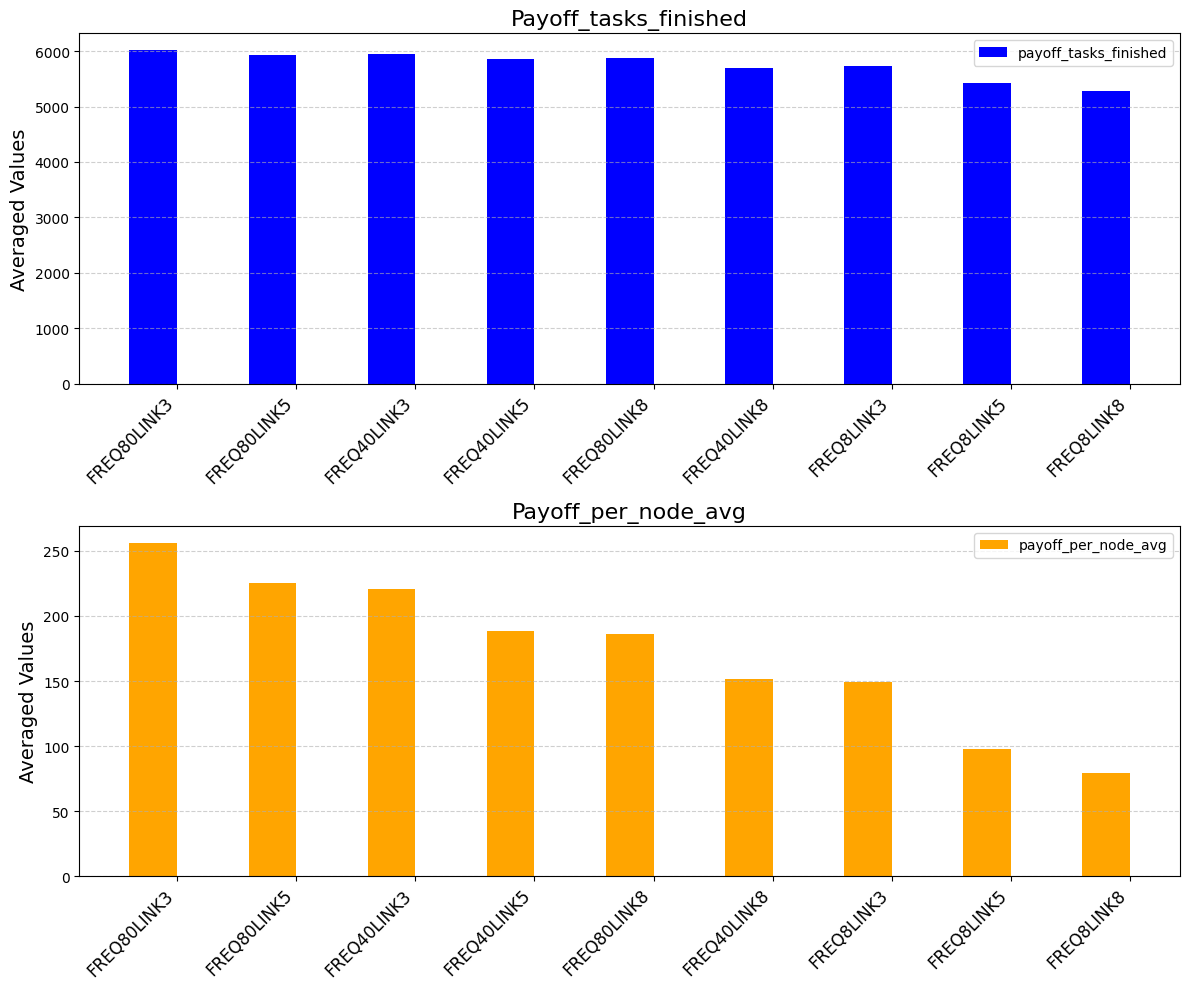

In [27]:
# plot averaged data

# Function to clean file names for shorter labels
def clean_filename(file_name):
    # Extract the core meaningful part (e.g., remove prefixes and extensions)
    return file_name.replace("new2", "").replace("-spreadsheet.csv", "").replace(" ", "").replace("_", "").replace("FINAL", "")

# Prepare filtered data for plotting
categories = []
payoff_tasks_finished_data = []
payoff_per_node_avg_data = []

for file_name, averaged_data in averaged_data_frames.items():
    cleaned_name = clean_filename(file_name)
    categories.append(cleaned_name)
    if "payoff_tasks_finished" in averaged_data.columns:
        payoff_tasks_finished_data.append(averaged_data["payoff_tasks_finished"].values[0])
    if "payoff_per_node_avg" in averaged_data.columns:
        payoff_per_node_avg_data.append(averaged_data["payoff_per_node_avg"].values[0])

# Sort the data in descending order based on the 'payoff_per_node_avg' values
sorted_indices = np.argsort(payoff_per_node_avg_data)[::-1]  # Sort in descending order
categories_sorted = [categories[i] for i in sorted_indices]
payoff_tasks_finished_sorted = [payoff_tasks_finished_data[i] for i in sorted_indices]
payoff_per_node_avg_sorted = [payoff_per_node_avg_data[i] for i in sorted_indices]

# Define the x positions for the grouped bars
x = np.arange(len(categories_sorted))
bar_width = 0.4  # Width of each bar

# Create bar plots for both metrics
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# Bar plot for 'payoff_tasks_finished'
axs[0].bar(
    x - bar_width / 2,  # Shift left for grouping
    payoff_tasks_finished_sorted,
    width=bar_width,
    color='blue',
    label='payoff_tasks_finished'
)
axs[0].set_title("Payoff_tasks_finished", fontsize=16)
axs[0].set_xticks(x)
axs[0].set_xticklabels(categories_sorted, rotation=45, ha='right', fontsize=12)
axs[0].set_ylabel("Averaged Values", fontsize=14)
axs[0].grid(axis='y', linestyle='--', alpha=0.6)
axs[0].legend(loc='upper right')

# Bar plot for 'payoff_per_node_avg'
axs[1].bar(
    x - bar_width / 2,  # Shift left for grouping
    payoff_per_node_avg_sorted,
    width=bar_width,
    color='orange',
    label='payoff_per_node_avg'
)
axs[1].set_title("Payoff_per_node_avg", fontsize=16)
axs[1].set_xticks(x)
axs[1].set_xticklabels(categories_sorted, rotation=45, ha='right', fontsize=12)
axs[1].set_ylabel("Averaged Values", fontsize=14)
axs[1].grid(axis='y', linestyle='--', alpha=0.6)
axs[1].legend(loc='upper right')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


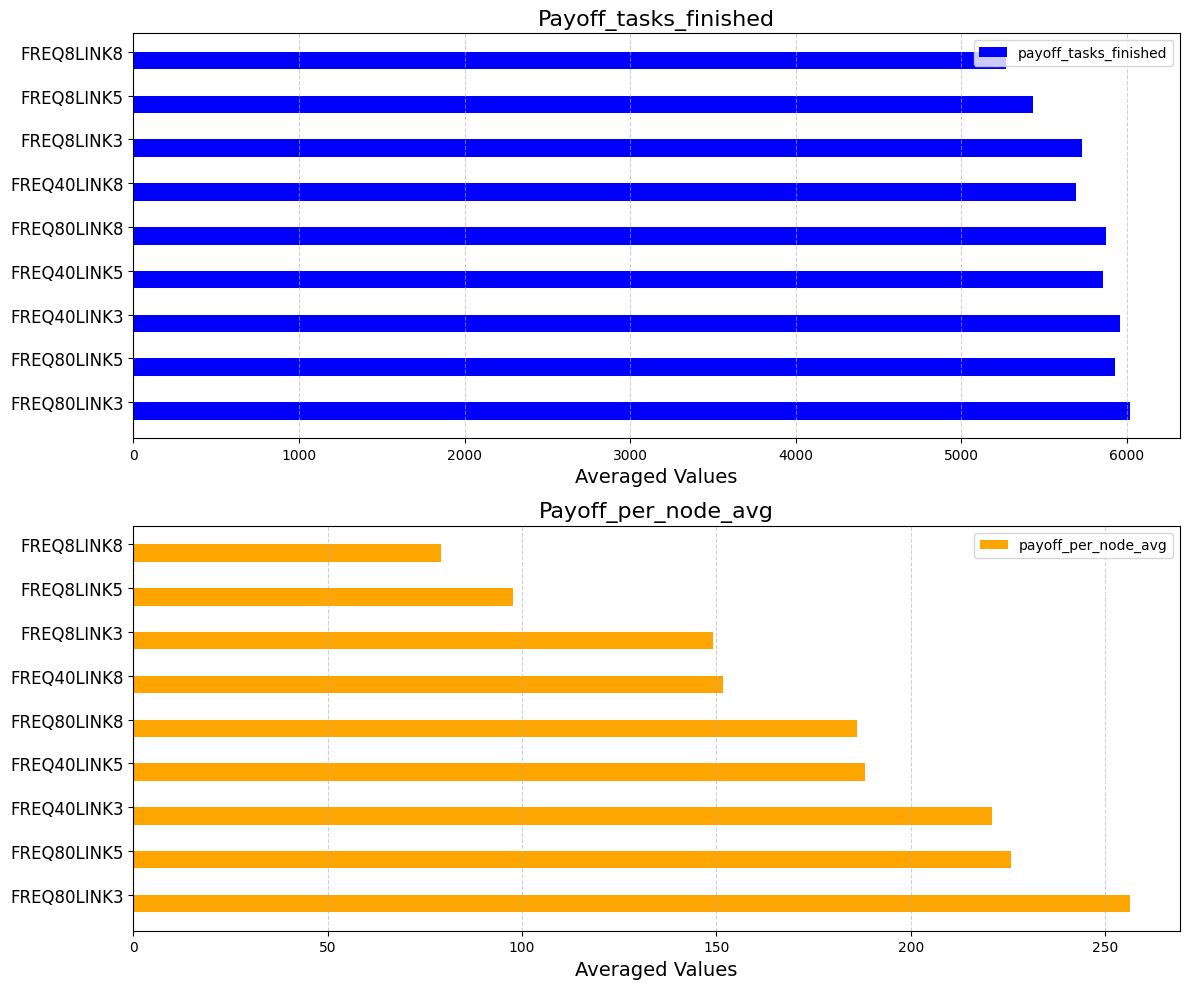

In [28]:
# Define the y positions for the grouped bars
y = np.arange(len(categories_sorted))
bar_height = 0.4  # Height of each bar

# Create horizontal bar plots for both metrics
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# Horizontal bar plot for 'payoff_tasks_finished'
axs[0].barh(
    y - bar_height / 2,  # Shift down for grouping
    payoff_tasks_finished_sorted,
    height=bar_height,
    color='blue',
    label='payoff_tasks_finished'
)
axs[0].set_title("Payoff_tasks_finished", fontsize=16)
axs[0].set_yticks(y)
axs[0].set_yticklabels(categories_sorted, fontsize=12)
axs[0].set_xlabel("Averaged Values", fontsize=14)
axs[0].grid(axis='x', linestyle='--', alpha=0.6)
axs[0].legend(loc='upper right')

# Horizontal bar plot for 'payoff_per_node_avg'
axs[1].barh(
    y - bar_height / 2,  # Shift down for grouping
    payoff_per_node_avg_sorted,
    height=bar_height,
    color='orange',
    label='payoff_per_node_avg'
)
axs[1].set_title("Payoff_per_node_avg", fontsize=16)
axs[1].set_yticks(y)
axs[1].set_yticklabels(categories_sorted, fontsize=12)
axs[1].set_xlabel("Averaged Values", fontsize=14)
axs[1].grid(axis='x', linestyle='--', alpha=0.6)
axs[1].legend(loc='upper right')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


### Plot scatter plots / box plots of all the data points too show the variance

In [ ]:
# Create a dictionary to store the collected data for each metric
collected_data_frames = {}

# Iterate over each DataFrame in the dictionary
for file_name, data in data_frames.items():
    print(f"Processing file: {file_name}")
    
    # Create a new DataFrame to store the collected data for each metric
    collected_data = pd.DataFrame()

    # Group similar columns by their base name
    base_names = set(col.split('.')[0] for col in data.columns)  # Extract base names
    
    # Iterate over each base name (task or node)
    for base_name in base_names:
        # Find all columns that share the same base name (e.g., 'payoff_tasks_finished')
        matching_columns = [col for col in data.columns if col.startswith(base_name)]
        
        # Collect all values for these columns (instead of variance)
        collected_data[base_name] = data[matching_columns].values.flatten()

    # Store the collected data
    collected_data_frames[file_name] = collected_data
    
    # Print the collected data DataFrame
    print(f"Collected results for {file_name}:")
    print(collected_data)

# Extract data for each metric and prepare for boxplot
payoff_tasks_finished_values = []
payoff_per_node_avg_values = []
file_names = []

# Loop over each file to collect data for the two metrics
for file_name, collected_data in collected_data_frames.items():
    if "payoff_tasks_finished" in collected_data.columns:
        payoff_tasks_finished_values.append(collected_data["payoff_tasks_finished"].tolist())
    if "payoff_per_node_avg" in collected_data.columns:
        payoff_per_node_avg_values.append(collected_data["payoff_per_node_avg"].tolist())
    file_names.append(clean_filename(file_name))  # Clean filenames for better readability

# Flatten the values lists
flattened_payoff_tasks_finished_values = [item for sublist in payoff_tasks_finished_values for item in sublist]
flattened_payoff_per_node_avg_values = [item for sublist in payoff_per_node_avg_values for item in sublist]

# Prepare the data for plotting
collected_data = {
    'File Name': file_names * (len(flattened_payoff_tasks_finished_values) // len(file_names)),
    'payoff_tasks_finished Values': flattened_payoff_tasks_finished_values,
    'payoff_per_node_avg Values': flattened_payoff_per_node_avg_values
}

# Create a DataFrame from the collected data
collected_df = pd.DataFrame(collected_data)

# Melt the DataFrame for easier plotting with seaborn
melted_collected_df = collected_df.melt(id_vars=['File Name'], var_name='Metric', value_name='Value')

# Calculate the mean values for each file
mean_values = collected_df.groupby('File Name').mean().reset_index()

# Sort the file names by the highest mean value of 'payoff_tasks_finished Values' in descending order
sorted_file_names = mean_values.sort_values(by='payoff_per_node_avg Values', ascending=False)['File Name']

# Reorder the melted DataFrame based on the sorted file names
melted_collected_df['File Name'] = pd.Categorical(melted_collected_df['File Name'], categories=sorted_file_names, ordered=True)

# Plotting boxplots for 'payoff_tasks_finished Values'
plt.figure(figsize=(14, 8))
sns.boxplot(x='File Name', y='Value', data=melted_collected_df[melted_collected_df['Metric'] == 'payoff_tasks_finished Values'], palette="Set2")
plt.title('Distribution of Payoff Tasks Finished Across Files', fontsize=16)
plt.xlabel('File Name', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting boxplots for 'payoff_per_node_avg Values'
plt.figure(figsize=(14, 8))
sns.boxplot(x='File Name', y='Value', data=melted_collected_df[melted_collected_df['Metric'] == 'payoff_per_node_avg Values'], palette="Set2")
plt.title('Distribution of Payoff per Node Avg Across Files', fontsize=16)
plt.xlabel('File Name', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Processing file: new2 FINAL_FREQ_40_LINK_3-spreadsheet.csv
Collected results for new2 FINAL_FREQ_40_LINK_3-spreadsheet.csv:
   payoff_per_node_avg  payoff_tasks_finished         tasks-finished
0           237.040000                   5926  [387 387 454 412 351]
1           218.555556                   5901  [425 409 399 379 389]
2           228.307692                   5936  [406 405 418 374 394]
3           216.428571                   6060  [375 379 430 418 393]
4           216.214286                   6054  [372 395 382 419 414]
5           216.296296                   5840  [397 402 421 394 360]
6           229.115385                   5957  [411 370 426 367 412]
7           228.884615                   5951  [420 380 405 394 396]
8           215.857143                   6044  [394 387 373 423 413]
9           203.034483                   5888  [392 395 399 381 397]
Processing file: new2 FINAL_FREQ_40_LINK_5-spreadsheet.csv
Collected results for new2 FINAL_FREQ_40_LINK_5-spreadshee

NameError: name 'melted_collected_df' is not defined

### Note for plots above:
#### Order is the same as in average values plot (mean values descending) this is not the same order as the median values descending would be!

### (See how values change over time) better to see in live demo in NetLogo

new2 FINAL_FREQ_40_LINK_3-spreadsheet.csv columns: Index(['[all run data]', '[step]', 'tasks-finished', 'payoff_tasks_finished',
       'payoff_per_node_avg', '[step].1', 'tasks-finished.1',
       'payoff_tasks_finished.1', 'payoff_per_node_avg.1', '[step].2',
       'tasks-finished.2', 'payoff_tasks_finished.2', 'payoff_per_node_avg.2',
       '[step].3', 'tasks-finished.3', 'payoff_tasks_finished.3',
       'payoff_per_node_avg.3', '[step].4', 'tasks-finished.4',
       'payoff_tasks_finished.4', 'payoff_per_node_avg.4', '[step].5',
       'tasks-finished.5', 'payoff_tasks_finished.5', 'payoff_per_node_avg.5',
       '[step].6', 'tasks-finished.6', 'payoff_tasks_finished.6',
       'payoff_per_node_avg.6', '[step].7', 'tasks-finished.7',
       'payoff_tasks_finished.7', 'payoff_per_node_avg.7', '[step].8',
       'tasks-finished.8', 'payoff_tasks_finished.8', 'payoff_per_node_avg.8',
       '[step].9', 'tasks-finished.9', 'payoff_tasks_finished.9',
       'payoff_per_node_avg.9'],


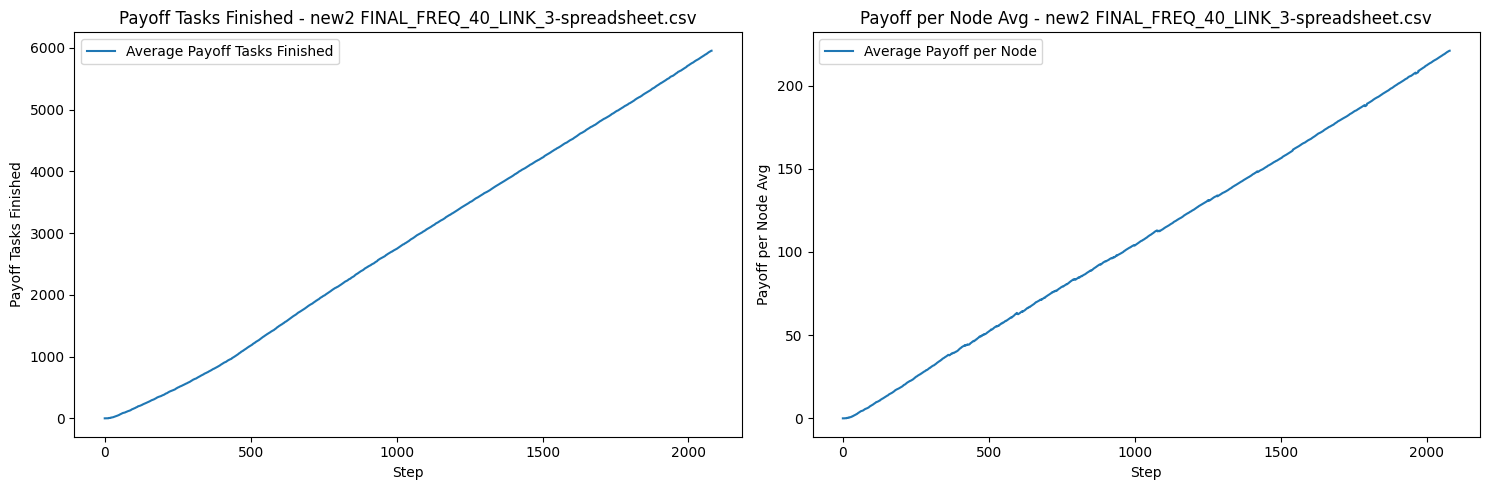

new2 FINAL_FREQ_40_LINK_5-spreadsheet.csv columns: Index(['[all run data]', '[step]', 'tasks-finished', 'payoff_tasks_finished',
       'payoff_per_node_avg', '[step].1', 'tasks-finished.1',
       'payoff_tasks_finished.1', 'payoff_per_node_avg.1', '[step].2',
       'tasks-finished.2', 'payoff_tasks_finished.2', 'payoff_per_node_avg.2',
       '[step].3', 'tasks-finished.3', 'payoff_tasks_finished.3',
       'payoff_per_node_avg.3', '[step].4', 'tasks-finished.4',
       'payoff_tasks_finished.4', 'payoff_per_node_avg.4', '[step].5',
       'tasks-finished.5', 'payoff_tasks_finished.5', 'payoff_per_node_avg.5',
       '[step].6', 'tasks-finished.6', 'payoff_tasks_finished.6',
       'payoff_per_node_avg.6', '[step].7', 'tasks-finished.7',
       'payoff_tasks_finished.7', 'payoff_per_node_avg.7', '[step].8',
       'tasks-finished.8', 'payoff_tasks_finished.8', 'payoff_per_node_avg.8',
       '[step].9', 'tasks-finished.9', 'payoff_tasks_finished.9',
       'payoff_per_node_avg.9'],


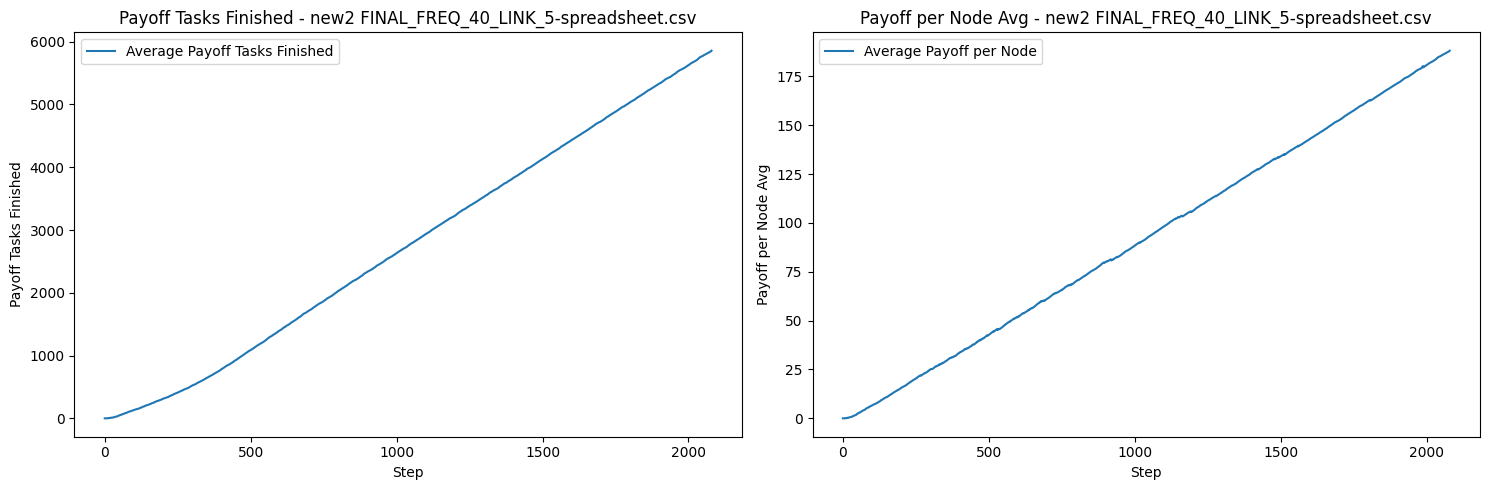

new2 FINAL_FREQ_40_LINK_8-spreadsheet.csv columns: Index(['[all run data]', '[step]', 'tasks-finished', 'payoff_tasks_finished',
       'payoff_per_node_avg', '[step].1', 'tasks-finished.1',
       'payoff_tasks_finished.1', 'payoff_per_node_avg.1', '[step].2',
       'tasks-finished.2', 'payoff_tasks_finished.2', 'payoff_per_node_avg.2',
       '[step].3', 'tasks-finished.3', 'payoff_tasks_finished.3',
       'payoff_per_node_avg.3', '[step].4', 'tasks-finished.4',
       'payoff_tasks_finished.4', 'payoff_per_node_avg.4', '[step].5',
       'tasks-finished.5', 'payoff_tasks_finished.5', 'payoff_per_node_avg.5',
       '[step].6', 'tasks-finished.6', 'payoff_tasks_finished.6',
       'payoff_per_node_avg.6', '[step].7', 'tasks-finished.7',
       'payoff_tasks_finished.7', 'payoff_per_node_avg.7', '[step].8',
       'tasks-finished.8', 'payoff_tasks_finished.8', 'payoff_per_node_avg.8',
       '[step].9', 'tasks-finished.9', 'payoff_tasks_finished.9',
       'payoff_per_node_avg.9'],


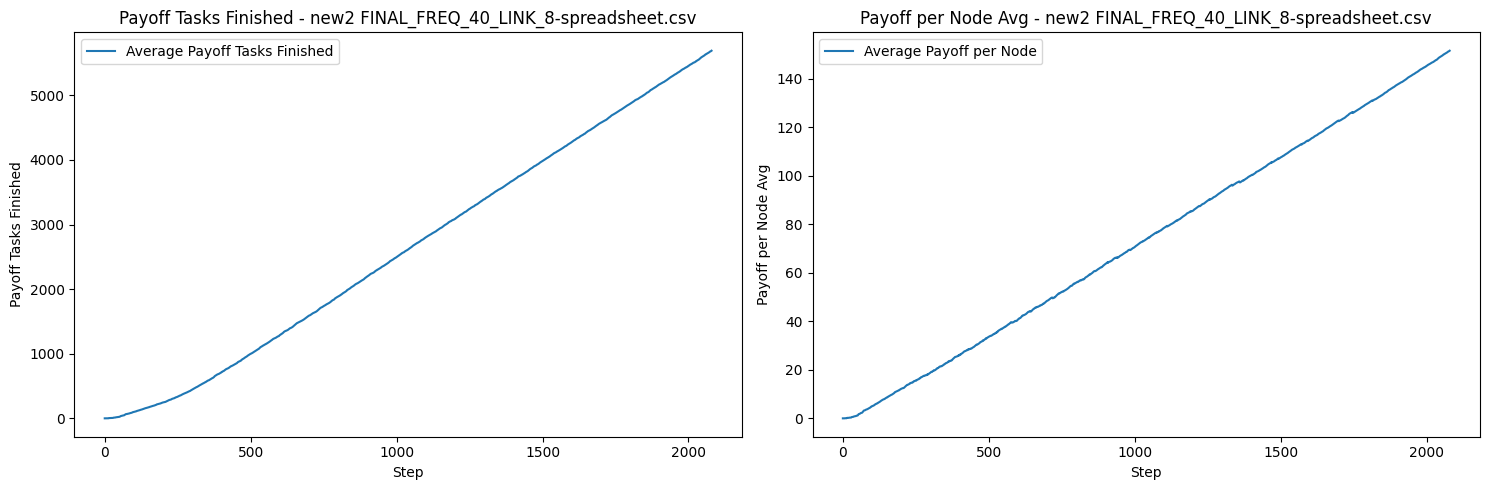

new2 FINAL_FREQ_80_LINK_3-spreadsheet.csv columns: Index(['[all run data]', '[step]', 'tasks-finished', 'payoff_tasks_finished',
       'payoff_per_node_avg', '[step].1', 'tasks-finished.1',
       'payoff_tasks_finished.1', 'payoff_per_node_avg.1', '[step].2',
       'tasks-finished.2', 'payoff_tasks_finished.2', 'payoff_per_node_avg.2',
       '[step].3', 'tasks-finished.3', 'payoff_tasks_finished.3',
       'payoff_per_node_avg.3', '[step].4', 'tasks-finished.4',
       'payoff_tasks_finished.4', 'payoff_per_node_avg.4', '[step].5',
       'tasks-finished.5', 'payoff_tasks_finished.5', 'payoff_per_node_avg.5',
       '[step].6', 'tasks-finished.6', 'payoff_tasks_finished.6',
       'payoff_per_node_avg.6', '[step].7', 'tasks-finished.7',
       'payoff_tasks_finished.7', 'payoff_per_node_avg.7', '[step].8',
       'tasks-finished.8', 'payoff_tasks_finished.8', 'payoff_per_node_avg.8',
       '[step].9', 'tasks-finished.9', 'payoff_tasks_finished.9',
       'payoff_per_node_avg.9'],


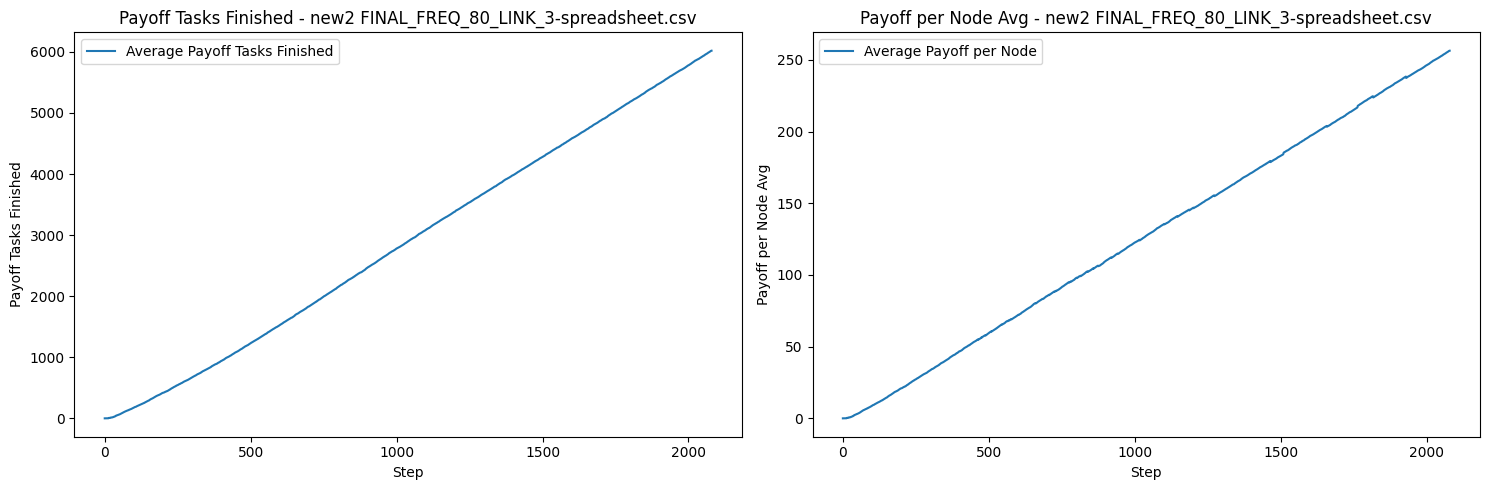

new2 FINAL_FREQ_80_LINK_5-spreadsheet.csv columns: Index(['[all run data]', '[step]', 'tasks-finished', 'payoff_tasks_finished',
       'payoff_per_node_avg', '[step].1', 'tasks-finished.1',
       'payoff_tasks_finished.1', 'payoff_per_node_avg.1', '[step].2',
       'tasks-finished.2', 'payoff_tasks_finished.2', 'payoff_per_node_avg.2',
       '[step].3', 'tasks-finished.3', 'payoff_tasks_finished.3',
       'payoff_per_node_avg.3', '[step].4', 'tasks-finished.4',
       'payoff_tasks_finished.4', 'payoff_per_node_avg.4', '[step].5',
       'tasks-finished.5', 'payoff_tasks_finished.5', 'payoff_per_node_avg.5',
       '[step].6', 'tasks-finished.6', 'payoff_tasks_finished.6',
       'payoff_per_node_avg.6', '[step].7', 'tasks-finished.7',
       'payoff_tasks_finished.7', 'payoff_per_node_avg.7', '[step].8',
       'tasks-finished.8', 'payoff_tasks_finished.8', 'payoff_per_node_avg.8',
       '[step].9', 'tasks-finished.9', 'payoff_tasks_finished.9',
       'payoff_per_node_avg.9'],


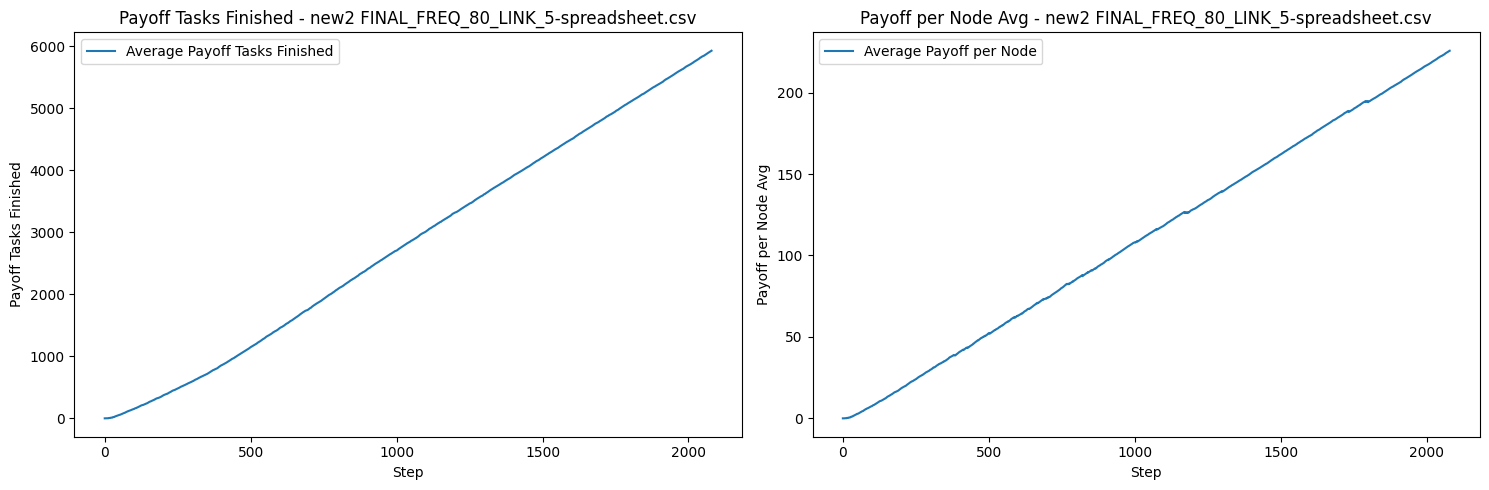

new2 FINAL_FREQ_80_LINK_8-spreadsheet.csv columns: Index(['[all run data]', '[step]', 'tasks-finished', 'payoff_tasks_finished',
       'payoff_per_node_avg', '[step].1', 'tasks-finished.1',
       'payoff_tasks_finished.1', 'payoff_per_node_avg.1', '[step].2',
       'tasks-finished.2', 'payoff_tasks_finished.2', 'payoff_per_node_avg.2',
       '[step].3', 'tasks-finished.3', 'payoff_tasks_finished.3',
       'payoff_per_node_avg.3', '[step].4', 'tasks-finished.4',
       'payoff_tasks_finished.4', 'payoff_per_node_avg.4', '[step].5',
       'tasks-finished.5', 'payoff_tasks_finished.5', 'payoff_per_node_avg.5',
       '[step].6', 'tasks-finished.6', 'payoff_tasks_finished.6',
       'payoff_per_node_avg.6', '[step].7', 'tasks-finished.7',
       'payoff_tasks_finished.7', 'payoff_per_node_avg.7', '[step].8',
       'tasks-finished.8', 'payoff_tasks_finished.8', 'payoff_per_node_avg.8',
       '[step].9', 'tasks-finished.9', 'payoff_tasks_finished.9',
       'payoff_per_node_avg.9'],


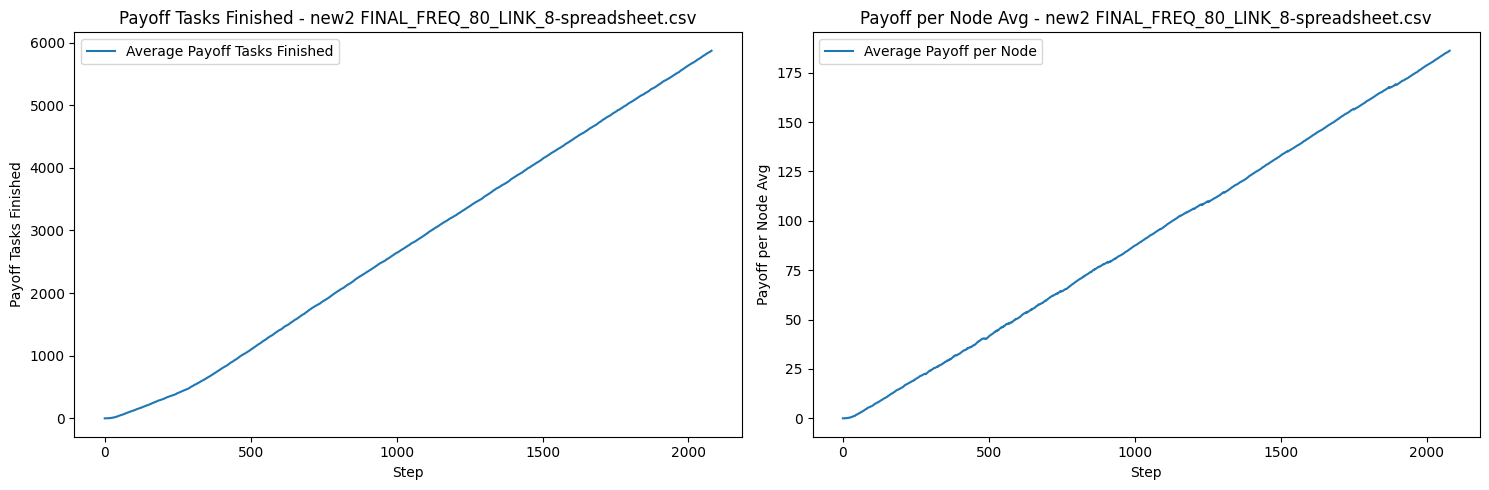

new2 FINAL_FREQ_8_LINK_3-spreadsheet.csv columns: Index(['[all run data]', '[step]', 'tasks-finished', 'payoff_tasks_finished',
       'payoff_per_node_avg', '[step].1', 'tasks-finished.1',
       'payoff_tasks_finished.1', 'payoff_per_node_avg.1', '[step].2',
       'tasks-finished.2', 'payoff_tasks_finished.2', 'payoff_per_node_avg.2',
       '[step].3', 'tasks-finished.3', 'payoff_tasks_finished.3',
       'payoff_per_node_avg.3', '[step].4', 'tasks-finished.4',
       'payoff_tasks_finished.4', 'payoff_per_node_avg.4', '[step].5',
       'tasks-finished.5', 'payoff_tasks_finished.5', 'payoff_per_node_avg.5',
       '[step].6', 'tasks-finished.6', 'payoff_tasks_finished.6',
       'payoff_per_node_avg.6', '[step].7', 'tasks-finished.7',
       'payoff_tasks_finished.7', 'payoff_per_node_avg.7', '[step].8',
       'tasks-finished.8', 'payoff_tasks_finished.8', 'payoff_per_node_avg.8',
       '[step].9', 'tasks-finished.9', 'payoff_tasks_finished.9',
       'payoff_per_node_avg.9'],
 

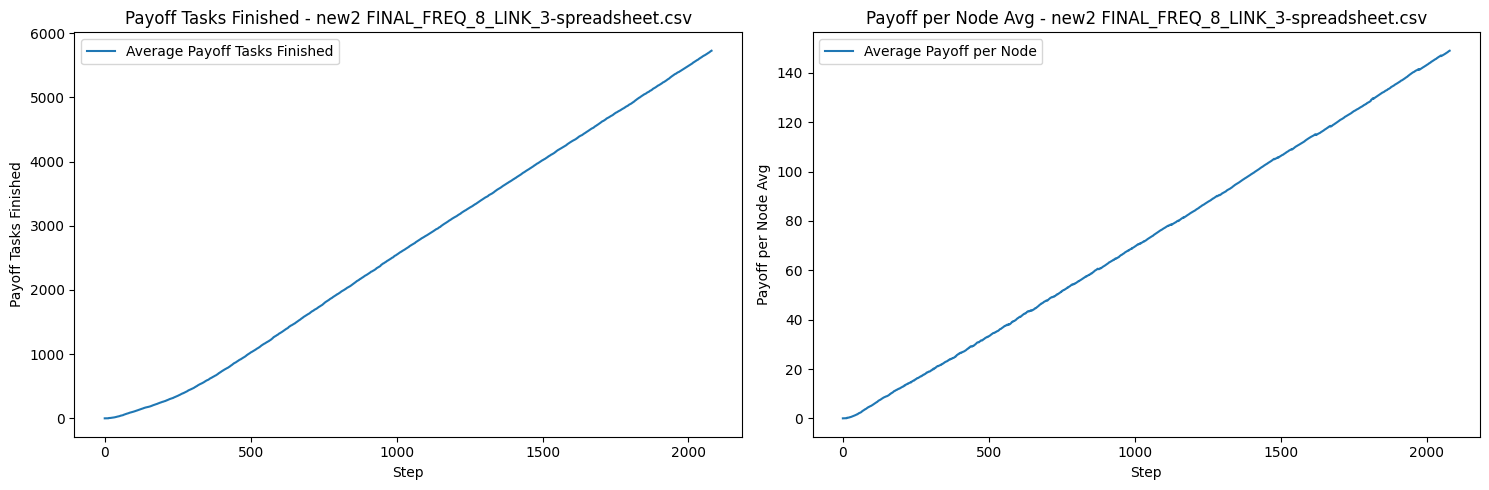

new2 FINAL_FREQ_8_LINK_5-spreadsheet.csv columns: Index(['[all run data]', '[step]', 'tasks-finished', 'payoff_tasks_finished',
       'payoff_per_node_avg', '[step].1', 'tasks-finished.1',
       'payoff_tasks_finished.1', 'payoff_per_node_avg.1', '[step].2',
       'tasks-finished.2', 'payoff_tasks_finished.2', 'payoff_per_node_avg.2',
       '[step].3', 'tasks-finished.3', 'payoff_tasks_finished.3',
       'payoff_per_node_avg.3', '[step].4', 'tasks-finished.4',
       'payoff_tasks_finished.4', 'payoff_per_node_avg.4', '[step].5',
       'tasks-finished.5', 'payoff_tasks_finished.5', 'payoff_per_node_avg.5',
       '[step].6', 'tasks-finished.6', 'payoff_tasks_finished.6',
       'payoff_per_node_avg.6', '[step].7', 'tasks-finished.7',
       'payoff_tasks_finished.7', 'payoff_per_node_avg.7', '[step].8',
       'tasks-finished.8', 'payoff_tasks_finished.8', 'payoff_per_node_avg.8',
       '[step].9', 'tasks-finished.9', 'payoff_tasks_finished.9',
       'payoff_per_node_avg.9'],
 

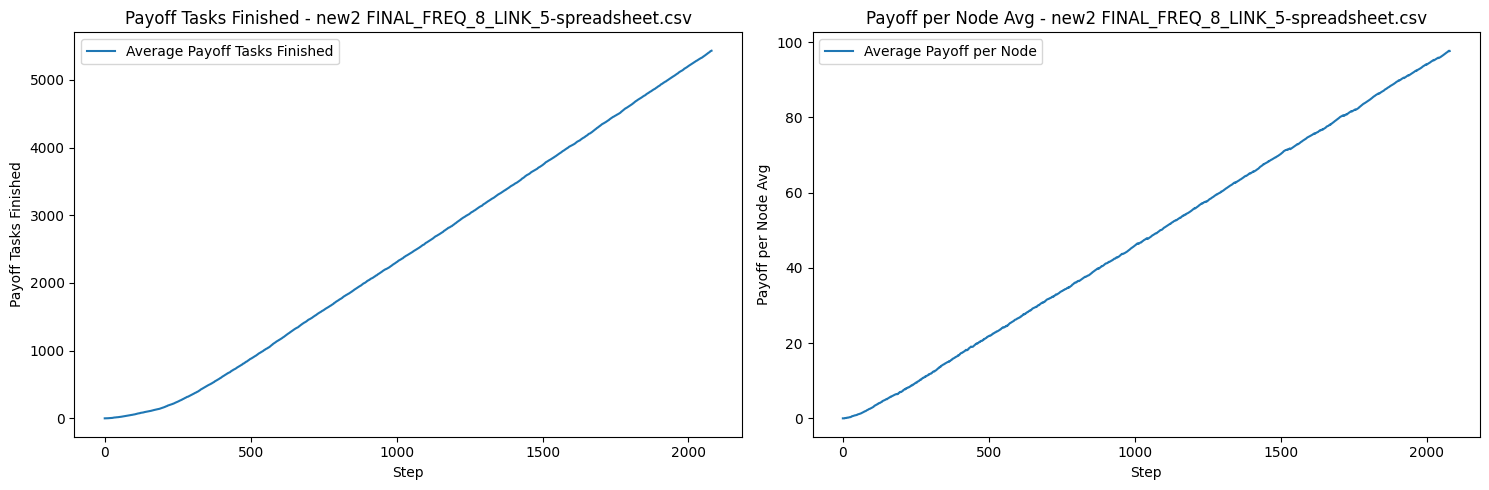

new2 FINAL_FREQ_8_LINK_8-spreadsheet.csv columns: Index(['[all run data]', '[step]', 'tasks-finished', 'payoff_tasks_finished',
       'payoff_per_node_avg', '[step].1', 'tasks-finished.1',
       'payoff_tasks_finished.1', 'payoff_per_node_avg.1', '[step].2',
       'tasks-finished.2', 'payoff_tasks_finished.2', 'payoff_per_node_avg.2',
       '[step].3', 'tasks-finished.3', 'payoff_tasks_finished.3',
       'payoff_per_node_avg.3', '[step].4', 'tasks-finished.4',
       'payoff_tasks_finished.4', 'payoff_per_node_avg.4', '[step].5',
       'tasks-finished.5', 'payoff_tasks_finished.5', 'payoff_per_node_avg.5',
       '[step].6', 'tasks-finished.6', 'payoff_tasks_finished.6',
       'payoff_per_node_avg.6', '[step].7', 'tasks-finished.7',
       'payoff_tasks_finished.7', 'payoff_per_node_avg.7', '[step].8',
       'tasks-finished.8', 'payoff_tasks_finished.8', 'payoff_per_node_avg.8',
       '[step].9', 'tasks-finished.9', 'payoff_tasks_finished.9',
       'payoff_per_node_avg.9'],
 

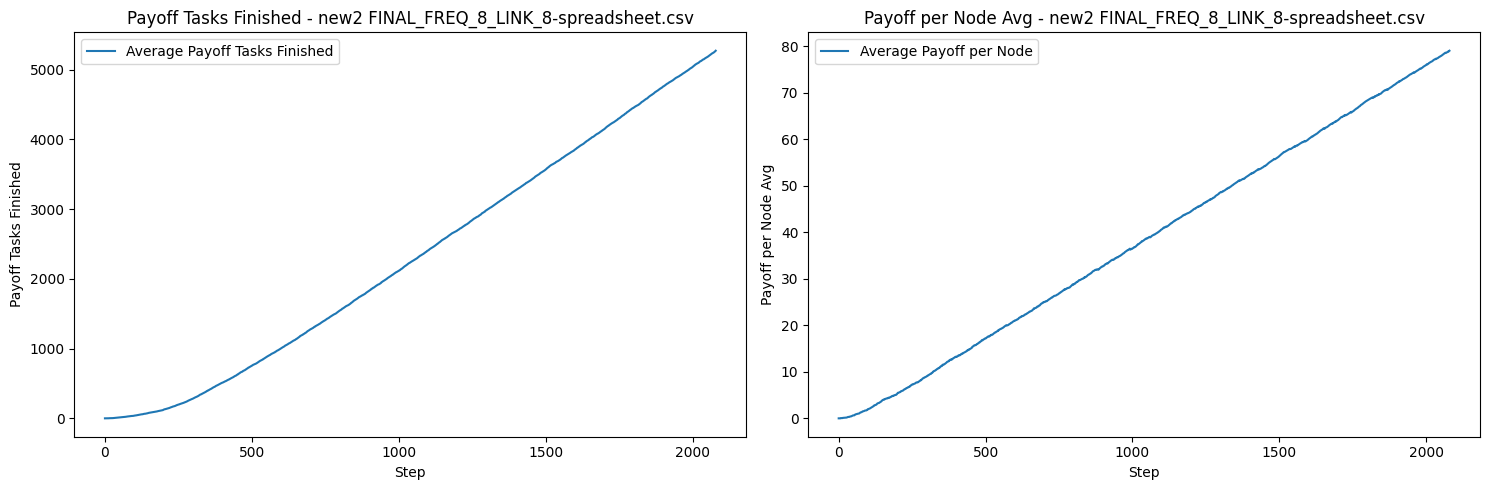

In [ ]:

# Directory containing the CSV files
data_folder = "../data"

# Dictionary to hold DataFrames
data_frames = {}

# Loop through all files in the data folder
for file_name in os.listdir(data_folder):
    if file_name.endswith('.csv'):
        # Load the CSV data into a DataFrame
        df = pd.read_csv(os.path.join(data_folder, file_name), skiprows=24)
        
        # Store the DataFrame in the dictionary with the file name as the key
        data_frames[file_name] = df

        # Display the columns of the DataFrame to verify      
        print(f"{file_name} columns: {df.columns}")

        # Initialize a figure with two subplots
        fig, ax = plt.subplots(1, 2, figsize=(15, 5))

        # Handle payoff_tasks_finished columns (including the .RunNumber)
        payoff_tasks_finished_cols = [col for col in df.columns if 'payoff_tasks_finished' in col]
        payoff_per_node_avg_cols = [col for col in df.columns if 'payoff_per_node_avg' in col]

        # Plot for 'payoff_tasks_finished'
        payoff_tasks_avg = []
        for step in df['[step]'].unique():
            step_data = df[df['[step]'] == step]
            # Compute the average over all runs for this step
            payoff_tasks_avg.append(step_data[payoff_tasks_finished_cols].mean(axis=1).mean())
        
        ax[0].plot(df['[step]'].unique(), payoff_tasks_avg, label='Average Payoff Tasks Finished')
        ax[0].set_title(f"Payoff Tasks Finished - {file_name}")
        ax[0].set_xlabel('Step')
        ax[0].set_ylabel('Payoff Tasks Finished')
        ax[0].legend()

        # Plot for 'payoff_per_node_avg'
        payoff_per_node_avg = []
        for step in df['[step]'].unique():
            step_data = df[df['[step]'] == step]
            # Compute the average over all runs for this step
            payoff_per_node_avg.append(step_data[payoff_per_node_avg_cols].mean(axis=1).mean())
        
        ax[1].plot(df['[step]'].unique(), payoff_per_node_avg, label='Average Payoff per Node')
        ax[1].set_title(f"Payoff per Node Avg - {file_name}")
        ax[1].set_xlabel('Step')
        ax[1].set_ylabel('Payoff per Node Avg')
        ax[1].legend()

        # Display the plots
        plt.tight_layout()
        plt.show()

